# BERT

- Bidirectional Encoder Representation from Transformers
- NLP model by Google
- enables machine to comprehend and nuances in language

## Table of contents

1. Intro to Bert

   - What is BERT.
   - Importance of BERT
   - Working of BERT

2. Preprocessing Text for Bert

   - tokenization
   - Input Formatting
   - Masked Language Model (MLM) Objective

3. Fine-Tuning BERT for Specific Tasks

   - BERT's Architecture Variations (BERT-base. BERT-large, etc.)
   - Transfer Learning
   - Downstream Tasks and Fine-Tuning
   - Example: Text Classification with BERT

4. BERT’s Attention Mechanism

   - Self-Attention
   - Multi-Head Attention
   - Attention in BERT
   - Visualization of Attention Weights 5. BERT’s Training Process

5. BERT’s Training Process

   - Pretraining Phase
   - Masked Language Model (MLM) Objective
   - Next Sentence Prediction (NSP) Objective 6. BERT Embeddings

6. BERT Embeddings

   - Word Embeddings vs. Contextual Word Embeddings
   - WordPiece Tokenization
   - Positional Encodings 7. BERT’s Advanced Techniques

7. BERT's Advanced Technique

   - Fine-Tuning Strategies
   - Handling Out-of-Vocabulary (OOV) Words
   - Domain Adaptation with BERT
   - Knowledge Distillation from BERT 8. Recent Developments and Variants

8. Recent Developments and Variants

   - RoBERTa (A Stronger Baseline)
   - ALBERT (A Lite BERT)
   - DistilBERT (Compact Version)
   - ELECTRA (Efficiently Learning an Encoder) 9. BERT for Sequence-to-Sequence Tasks

9. BERT for Sequence-to-Sequence Tasks

   - BERT for Text Summarization
   - BERT for Language Translation
   - BERT for Conversational AI 10. Common Challenges and Mitigations

10. Common Challenges and Mitigations

    - BERT’s Computational Demands
    - Addressing Long Sequences
    - Overcoming Biases in BERT 11. Future Directions in NLP with BERT

11. Future Directions in NLP with BERT

    - OpenAI’s GPT Models
    - BERT’s Role in Pretrained Language Models
    - Ethical Considerations in BERT Applications 12. Implementing BERT with Hugging Face Transformers Library

12. Implementing BERT with Hugging Face Transformers Library
    - Installing Transformers
    - Loading Pretrained BERT Models
    - Tokenization and Input Formatting
    - Fine-Tuning BERT for Custom Tasks


# Chapter 1 Introduction to BERT

## What is BERT?
- Stands for Bidirectional Encoder Representation from Transformers
- enables machine to understand the nuances and contextual dependencies.


## Why is BERT Important?
- Traditional models precess sentence from left to right.
- BERT understands context driven relationship between words; this plays pivotal role in deriving meaning.
- It captures the essence directionality.


## How does BERT work?
- Core is the Transformers.
- Architecture incorporates self attention.
- self attention Allows BERT to weight the significance of each word based on its context, both directions
- generates contextualized word embeddings which are representation of words considering their meaning with sentences.
- Eg: The 'lead' singer will 'lead' the band.
    - Traditional models might struggle with the ambiguity of the word 'lead'.
    - but bert can distinguish that the first 'lead' is noun, while second is a verb.

# Self Attention

- ML mechanism, in transformer models
- allows model to weigh the importance of different within same input to better understand context, dependencies and meaning
- Enables model to focus on relevant parts of data regardless the distance.
- Works by creating context aware representation for each word, showing show much attention it should pay to every word (including itself)
- Forms richer, contextualized embeddings.

## How it works.

- Query, Key, Value (Q, K, V):

  - `Also Explain This query, key, value`
  - Each input word is transformed into three vectors
  - Query: says, what i'm looking for
  - Key: says, what i have to offer
  - Value: says, i am the actual information

- Scoring:

  - Model calculates attention scores by comparing each word's query with every other word's key

- Weighting:

  - Scores are normalized (using softmax)
  - This becomes attention weights
  - summing to 1
  - showing how much focus to give

- Contextual Outputs:
  - Weighted sum of value vectors is calculated
  - creates a new vector context-rich representation of each word (context vector)


----

# Chapter 2: Preprocessing Text for BERT

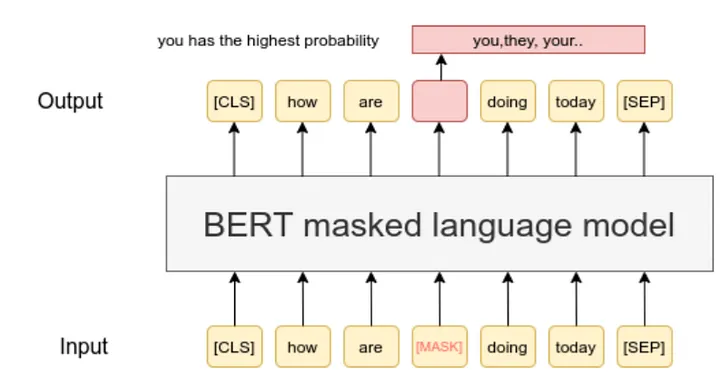

- Before BERT can work, text is needed to be prepared and structured in a way that it can understood by model.

## Tokenization:

- Breaking text into meaningful chunks (tokens)
- BERT uses WordPiece Tokenization.
- Splits words into smaller pieces like, `running -> run and ning`
- It helps handle tricky words and reduces the vocabulary size (reducing chances of getting unfamiliar words)
- Eg:
  - `ChatGPT is fascinating.` - > `["Chat", "##G", "##P", "is", fascinating", "."]`


## Input Formatting: Giving BERT the context
- Add special tokens like `[CLS]` at the beginning and `[SEP]` between sentences.
- `[CLS]` stands for classification
- `[SEP]` stands for separation
- Also assigns Segment Embedding.


```
What is Segment Embedding.
- a learned vector added to input tokens to help the model distinguish between different sentences (segments) in a single input sequence.
- 
```

## BERT Tokenizer
- Explain

In [1]:
import torch
from transformers import pipeline

pipeline = pipeline(
    task="fill-mask",
    model="google-bert/bert-base-uncased",
    dtype=torch.float16,
    device=0,
)
pipeline("Plants create [MASK] through a process known as photosynthesis.")

d:\repos\playground\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\repos\playground\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sudhanwa.kaveeshwar\.cache\huggingface\hub\models--google-bert--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate deve

[{'score': 0.1510009765625,
  'token': 2943,
  'token_str': 'energy',
  'sequence': 'plants create energy through a process known as photosynthesis.'},
 {'score': 0.145263671875,
  'token': 4870,
  'token_str': 'flowers',
  'sequence': 'plants create flowers through a process known as photosynthesis.'},
 {'score': 0.0821533203125,
  'token': 9325,
  'token_str': 'sunlight',
  'sequence': 'plants create sunlight through a process known as photosynthesis.'},
 {'score': 0.042938232421875,
  'token': 18670,
  'token_str': 'algae',
  'sequence': 'plants create algae through a process known as photosynthesis.'},
 {'score': 0.03759765625,
  'token': 12649,
  'token_str': 'atp',
  'sequence': 'plants create atp through a process known as photosynthesis.'}]

In [9]:
results = pipeline("In our solar system the Sun is a [MASK] and earth is a [MASK].")

In [10]:
results[0]

[{'score': 0.2486572265625,
  'token': 2732,
  'token_str': 'star',
  'sequence': '[CLS] in our solar system the sun is a star and earth is a [MASK]. [SEP]'},
 {'score': 0.1805419921875,
  'token': 3103,
  'token_str': 'sun',
  'sequence': '[CLS] in our solar system the sun is a sun and earth is a [MASK]. [SEP]'},
 {'score': 0.1341552734375,
  'token': 4231,
  'token_str': 'moon',
  'sequence': '[CLS] in our solar system the sun is a moon and earth is a [MASK]. [SEP]'},
 {'score': 0.056365966796875,
  'token': 4774,
  'token_str': 'planet',
  'sequence': '[CLS] in our solar system the sun is a planet and earth is a [MASK]. [SEP]'},
 {'score': 0.03338623046875,
  'token': 13152,
  'token_str': 'crescent',
  'sequence': '[CLS] in our solar system the sun is a crescent and earth is a [MASK]. [SEP]'}]

In [11]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, TokenClassificationPipeline

model_name = "QCRI/bert-base-multilingual-cased-pos-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

pipe2 = TokenClassificationPipeline(model=model, tokenizer=tokenizer)
outputs = pipe2("A test example")
print(outputs)


d:\repos\playground\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sudhanwa.kaveeshwar\.cache\huggingface\hub\models--QCRI--bert-base-multilingual-cased-pos-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Fal

[{'entity': 'DT', 'score': np.float32(0.9997243), 'index': 1, 'word': 'A', 'start': 0, 'end': 1}, {'entity': 'NN', 'score': np.float32(0.9997472), 'index': 2, 'word': 'test', 'start': 2, 'end': 6}, {'entity': 'NN', 'score': np.float32(0.99973196), 'index': 3, 'word': 'example', 'start': 7, 'end': 14}]


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [12]:
print(pipe2("The lead singer will lead the band"))

[{'entity': 'DT', 'score': np.float32(0.99983644), 'index': 1, 'word': 'The', 'start': 0, 'end': 3}, {'entity': 'JJ', 'score': np.float32(0.7657046), 'index': 2, 'word': 'lead', 'start': 4, 'end': 8}, {'entity': 'NN', 'score': np.float32(0.9998029), 'index': 3, 'word': 'singer', 'start': 9, 'end': 15}, {'entity': 'MD', 'score': np.float32(0.99946195), 'index': 4, 'word': 'will', 'start': 16, 'end': 20}, {'entity': 'VB', 'score': np.float32(0.999711), 'index': 5, 'word': 'lead', 'start': 21, 'end': 25}, {'entity': 'DT', 'score': np.float32(0.99985087), 'index': 6, 'word': 'the', 'start': 26, 'end': 29}, {'entity': 'NN', 'score': np.float32(0.99979657), 'index': 7, 'word': 'band', 'start': 30, 'end': 34}]
